In [29]:
import numpy as np
import scipy.signal
import sounddevice as sd
%matplotlib inline
from pylab import *
import matplotlib.figure
import itertools
import random
import mpld3
mpld3.enable_notebook()

In [2]:
test_signal = np.ones(80000)
for i in range(len(test_signal)):
    fuck = np.random.random()
    if fuck > 0.5:
        test_signal[i] = 0

In [3]:
import time
start = time.time()
sd.play(test_signal, 40000, blocking = True)
end = time.time()

print(end - start)

2.3190839290618896


In [4]:
test_signal = np.sin(np.linspace(0, 4, 4*40000) * 2 * np.pi * 440)
sd.play(test_signal, 40000)

In [21]:
def gauss_imp(BT, span, sample_rate):
    #num_coefficients is the sampling rate of the filter
    #3db_bandwidth is the 3db bandwidth of the gaussian filter
    #symbol time is the time difference between two symbols during transmission
    alph = np.sqrt(2. * np.pi / np.log(2)) * BT
    imp = np.linspace(- span * sample_rate / 2, span * sample_rate / 2, span*sample_rate)
    #generate coefficents
    imp *= np.sqrt(np.pi) * alph / sample_rate
    imp = - np.power(imp, 2)
    imp = np.exp(imp)
    imp *= alph
    imp /= sum(imp)
    return imp

def convolve(data, imp):
    out = []
    for a in range(len(data)):
        count = 0
        for i in range(len(imp)):
            if a - i >= 0:
                count += imp[i] * data[a - i]
        out.append(count)
    return np.array(out)

def periodic_data(num_symbols, num_samples):
    return  scipy.signal.square(
          np.linspace(0, num_symbols,
                      num_symbols * num_samples, endpoint=False)
          * np.pi)

def random_data(num_symbols, num_samples):
    arr = []
    for i in range(num_symbols):
        symb = random.randint(0, 1)
        for j in range(num_samples):
            arr.append(symb)
    return np.array(arr)

def GFSK_mod(carrier_freq, mod_index, mod_sample_rate, data, bit_rate, BT, span):
    total_time = len(data) / bit_rate

    time = np.linspace(0, total_time, total_time * mod_sample_rate)

    bit_span = mod_sample_rate/bit_rate

    sampled_data = np.repeat(data, bit_span)

    imp = gauss_imp(BT, span, bit_span)

    filtered_data = np.convolve(sampled_data, imp, mode='same')

    plt.figure()
    plt.plot(filtered_data)
    plt.plot(sampled_data)

    plt.title('Filtered Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.show()

    return time, np.cos(2 * np.pi * carrier_freq * time + mod_index * filtered_data)

def transmit(signal):
    # signal is an np.array of the signal we are playing
    frames_per_second = 48000
    sd.play(data = signal, samplerate = fs, blocking = False)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0]


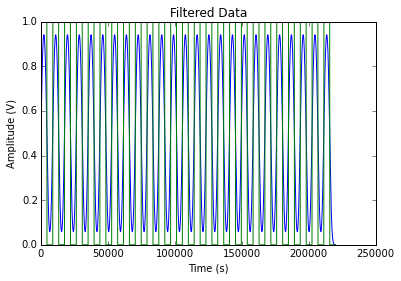

In [22]:
nsymb = 8
bit_rate = 10
BT = 0.5
fc = 1e2
mod_index = 5
mod_sample_rate = 44000
span = 2

period_data = np.array([1 if i%2 == 0 else 0 for i in range(50)])
print(period_data)

# GFSK_mod(carrier_freq, mod_index, mod_sample_rate, data, bit_rate, BT, span):
_,test_signal = GFSK_mod(440, mod_index, mod_sample_rate, period_data, bit_rate, BT, span)

In [32]:
sd.play(test_signal, samplerate = mod_sample_rate)